# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.179362e+01     6.440775e+00
 * time: 0.003348112106323242
     1     2.872976e+01     5.782077e+00
 * time: 0.009823083877563477
     2     2.445784e+01     8.223886e+00
 * time: 0.026324987411499023
     3     1.489162e+01     3.110889e+00
 * time: 0.04636716842651367
     4     1.185684e+01     1.182300e+00
 * time: 0.06182408332824707
     5     1.085181e+01     1.041299e+00
 * time: 0.0778050422668457
     6     1.024958e+01     1.961155e+00
 * time: 0.09069299697875977
     7     9.670241e+00     1.011525e+00
 * time: 0.10358309745788574
     8     9.477430e+00     5.642444e-01
 * time: 0.1163630485534668
     9     9.323888e+00     8.222387e-01
 * time: 0.12909603118896484
    10     9.211776e+00     5.003512e-01
 * time: 0.20348715782165527
    11     9.175822e+00     1.242083e+00
 * time: 0.21263694763183594
    12     9.092814e+00     5.647046e-01
 * time: 0.2218320369720459
    13     9.002260e+00     3.693253e-01
 * time:

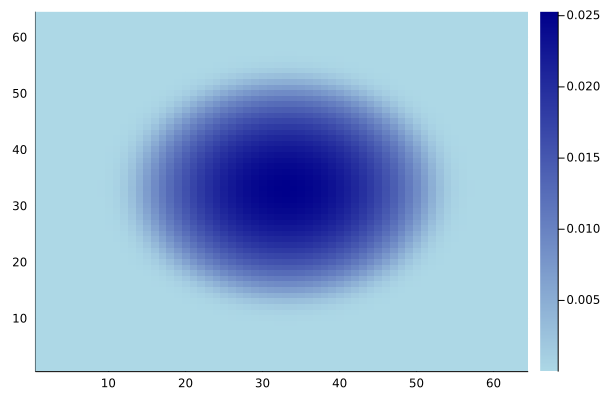

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)